In [27]:
print("hello world Akash")

hello world Akash


In [28]:
!pip install opencv-python scikit-learn numpy matplotlib

In [29]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the base path to the dataset
base_path = 'C:/Users/2004a/Downloads/Grapevine_Leaves_Image_Dataset/'

# List of class names (subfolders)
classes = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

# Initialize lists for images and labels
images = []
labels = []

# Load images and assign labels
for label, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        # Read image in grayscale (or use cv2.IMREAD_COLOR for RGB)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Resize to a fixed size (e.g., 64x64)
        img = cv2.resize(img, (64, 64))
        # Flatten the image into a 1D array
        img_flattened = img.flatten()
        images.append(img_flattened)
        labels.append(label)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 400, Testing samples: 100


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

Test Accuracy: 31.00%

Classification Report:
              precision    recall  f1-score   support

          Ak       0.26      0.21      0.24        28
   Ala_Idris       0.35      0.43      0.39        14
     Buzgulu       0.22      0.50      0.30        10
      Dimnit       0.44      0.46      0.45        24
       Nazli       0.25      0.12      0.17        24

    accuracy                           0.31       100
   macro avg       0.30      0.35      0.31       100
weighted avg       0.31      0.31      0.30       100



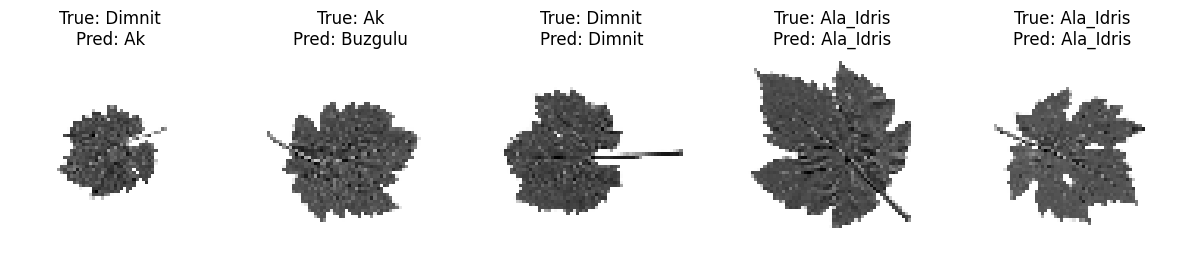

In [31]:
import matplotlib.pyplot as plt

# Function to display images with predictions
def plot_predictions(images, true_labels, pred_labels, class_names, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        # Reshape the flattened image back to 64x64
        img = images[i].reshape(64, 64)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

# Visualize some test predictions
plot_predictions(X_test, y_test, y_pred, classes)

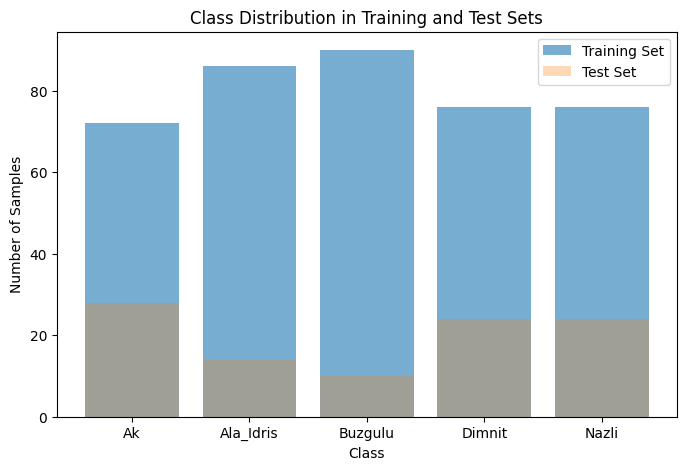

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Count samples per class
classes = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
class_counts = np.bincount(y_train)
class_counts_test = np.bincount(y_test)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(classes, class_counts, alpha=0.6, label='Training Set')
plt.bar(classes, class_counts_test, alpha=0.3, label='Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training and Test Sets')
plt.legend()
plt.show()

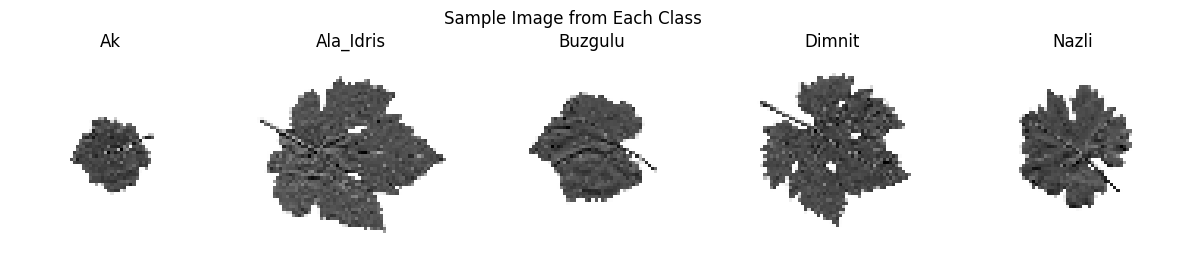

In [33]:
# Load one image per class for visualization
def load_sample_image(class_name, base_path):
    class_path = os.path.join(base_path, class_name)
    img_name = os.listdir(class_path)[0]  # Take first image
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (64, 64))

#base_path = '/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'
#base_path = 'C:/Users/2004a/Downloads/Grapevine_Leaves_Image_Dataset/'

plt.figure(figsize=(15, 3))
for i, class_name in enumerate(classes):
    img = load_sample_image(class_name, base_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.suptitle('Sample Image from Each Class')
plt.show()

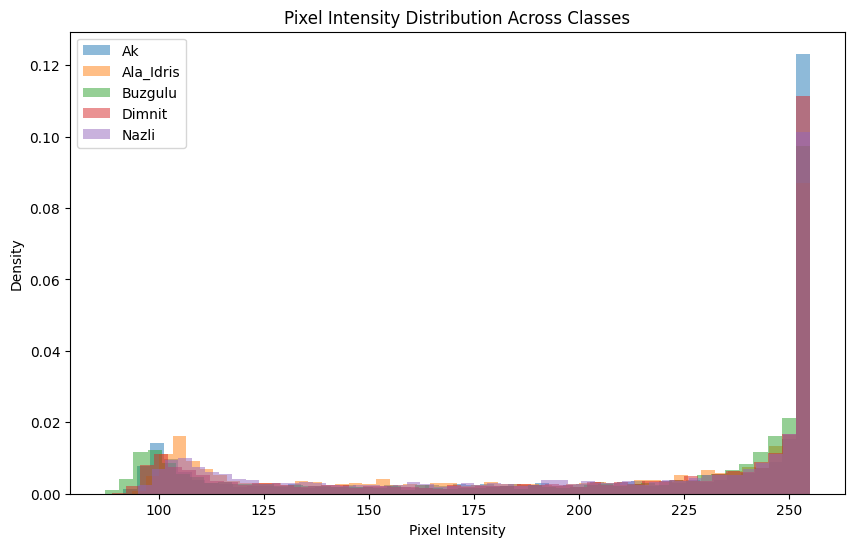

In [34]:
plt.figure(figsize=(10, 6))
for label, class_name in enumerate(classes):
    # Get all training images for this class
    class_images = X_train[y_train == label]
    # Compute average pixel intensities
    mean_pixels = class_images.mean(axis=0)
    plt.hist(mean_pixels, bins=50, alpha=0.5, label=class_name, density=True)
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Pixel Intensity Distribution Across Classes')
plt.legend()
plt.show()

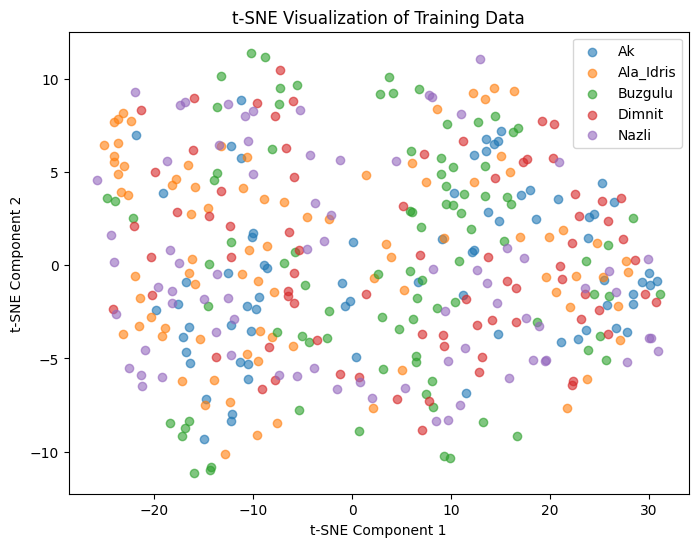

In [35]:
from sklearn.manifold import TSNE

# Apply t-SNE to training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Plot
plt.figure(figsize=(8, 6))
for label, class_name in enumerate(classes):
    mask = y_train == label
    plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], label=class_name, alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Training Data')
plt.legend()
plt.show()

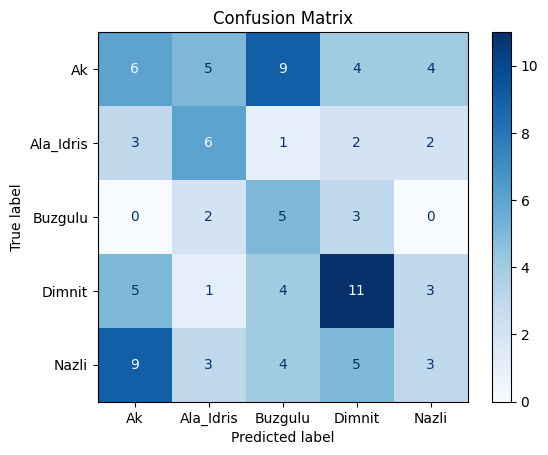

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- 1) Compute 2D features: mean & variance per image ---
X_train_2d = np.vstack([X_train.mean(axis=1), X_train.var(axis=1)]).T
X_test_2d  = np.vstack([X_test.mean(axis=1),  X_test.var(axis=1)]).T

# --- 2) Train a linear SVM ---
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_train_2d, y_train)

# --- 3) Plot analytic decision boundary ---
w, b = svm_2d.coef_[0], svm_2d.intercept_[0]
# pick x‐limits just beyond your data
x_min, x_max = X_train_2d[:,0].min() - 0.5, X_train_2d[:,0].max() + 0.5
x_vals = np.array([x_min, x_max])
y_vals = -(w[0] * x_vals + b) / w[1]

plt.figure(figsize=(8, 6))
# decision line
plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision boundary')

# scatter training points
for label, class_name in enumerate(classes):
    mask = (y_train == label)
    plt.scatter(
        X_train_2d[mask, 0],
        X_train_2d[mask, 1],
        label=class_name,
        edgecolors='k',
        alpha=0.8
    )

plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Pixel Intensity Variance')
plt.title('Linear SVM Decision Boundary (Analytic)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4) (Optional) Coarse‐grid contour fill for visualization ---
h = 0.5  # coarse step size → very few points
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(X_train_2d[:,1].min() - 0.5, X_train_2d[:,1].max() + 0.5, h)
)
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.3)
for label, class_name in enumerate(classes):
    mask = (y_train == label)
    plt.scatter(
        X_train_2d[mask, 0],
        X_train_2d[mask, 1],
        label=class_name,
        edgecolors='k'
    )
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Pixel Intensity Variance')
plt.title('Linear SVM Decision Regions (Coarse Mesh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5) Evaluate on test set ---
y_pred_2d = svm_2d.predict(X_test_2d)
print(f"2D SVM Accuracy: {accuracy_score(y_test, y_pred_2d) * 100:.2f}%")
